In [4]:
%matplotlib inline
import csv
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

TRAIN_FILE_PATH = "data/X_train.csv"
TARGET_FILE_PATH =  "data/y_train.csv"
TEST_FILE_PATH = "data/X_test.csv"

In [10]:
#Load train and test set

train_data = pd.read_csv(TRAIN_FILE_PATH)
train_data.drop(train_data.columns[0], axis=1, inplace=True)

Y_train = pd.read_csv(TARGET_FILE_PATH)
Y_train.drop(Y_train.columns[0], axis=1, inplace = True)

test_data =  pd.read_csv(TEST_FILE_PATH)
id_test = test_data.columns[0]
test_data.drop(test_data.columns[0], axis=1, inplace=True)

In [11]:
# fill missing values with mean column values train and test set
def fill_NaN(train, test):
    
    print("Train shape: ", train.shape)
    print("Test shape: ",test.shape)
    
    train_mean_values = train.mean()
    train =  train.fillna(train_mean_values)
    test = test.fillna(train_mean_values)
    
    return train,test


In [12]:
train_data_mean, test_data_mean = fill_NaN(train_data, test_data)

Train shape:  (1212, 887)
Test shape:  (776, 887)


In [13]:
#Zero mean unit variance for train and test data
def scale_data(train, test):
    
    print("Train shape: ", train.shape)
    print("Test shape: ",test.shape)
    
    scaler = StandardScaler().fit(train, Y_train)
    train = scaler.transform(train)
    test = scaler.transform(test)
   
    return train, test

In [14]:
X_train_scaled, X_test_scaled = scale_data(train_data_mean, test_data_mean)

Train shape:  (1212, 887)
Test shape:  (776, 887)


(1212, 887)
(1212, 1)
[731 772 523 493 746  82 685 333 391 722 882 751 291   0  96 349 730 687
 363 673 340 664 604 185 838 300 180 309 665 686 608 744 297 345 853 490
 547 636  80 613 470 234 156 810 120 430 232 370 426  89 142 137 196 736
  42 237 332 634 111 201  85 871 505 520 229 460 224 560 554 205 372 643
  83 666  52 735 644 556 273 646 607 633   5 298 251  94 335 787 741 398
 716 388 186  88 739 326 158 615 484 632 840 638 652 637 791 660 609 618
 752 266 833 794   7 605 367  28 763 299 424 504 351 804 371 275 870 879
 795  66 198  32 457 823 611 151 781 450 697 269 277 599 209 479 844 135
 374 369 336 166 428  20]
150


/home/francesco/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/francesco/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/home/francesco/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/francesco/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/francesco/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & 

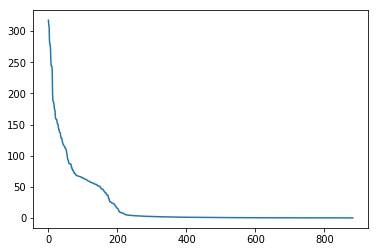

In [16]:
#Extract the features to use with f_regression

n_features_fr = 150

print(X_train_scaled.shape)
print(Y_train.shape)
features_scores = f_regression(X_train_scaled,Y_train)[0]
#print(features_scores)
y = list(features_scores)
myarray = np.asarray(y)

plt.plot(-1*np.sort(-1*myarray))

indices_fr = myarray.argsort()[-n_features_fr:][::-1]
print(indices_fr)
print(len(indices_fr))



/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[ 96 685 722  82 751 664 746 291 499  80 882 391 237 687 470 651 140 810
 547 686 349 838   0 185 529  94 340 309 613  89 665 591 604 730 173 673
 200 546 871 853 234 870 618 426 823 186 457   7 632 763 264 744 333 280
 158 636 388 560 300 609 331 196 137 109  19 274 229 328 743 555 450 554
 400 410 205 224 350 126 479 840 608 556 114 398 550  66 644  83 739 201
 482 775 490 737 276   5 803 297 536 192]


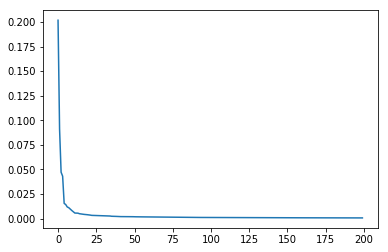

In [18]:
#Extract feature importance of Random Forest & find intersection/union with f_regression ones

n_features_rf = 100

rf = RandomForestRegressor(n_jobs=-1, n_estimators=50)
rf.fit(X_train_scaled,Y_train)

scores = list(rf.feature_importances_)
my_rf_features = np.asarray(scores)

plt.plot((-1*np.sort(-1*my_rf_features))[0:200])

indices_rf = my_rf_features.argsort()[-n_features_rf:][::-1]

print(indices_rf)
#print(-1*np.sort(-1*rf.feature_importances_));


In [19]:
# Find intersection/union between best f_regression features and random forest's

#print(set(indices_rf).intersection(indices_fr))
#indices = set(indices_rf).intersection(indices_fr)

indices = list(np.union1d(indices_rf, indices_fr))
print(indices)

[0, 5, 7, 19, 20, 28, 32, 42, 52, 66, 80, 82, 83, 85, 88, 89, 94, 96, 109, 111, 114, 120, 126, 135, 137, 140, 142, 151, 156, 158, 166, 173, 180, 185, 186, 192, 196, 198, 200, 201, 205, 209, 224, 229, 232, 234, 237, 251, 264, 266, 269, 273, 274, 275, 276, 277, 280, 291, 297, 298, 299, 300, 309, 326, 328, 331, 332, 333, 335, 336, 340, 345, 349, 350, 351, 363, 367, 369, 370, 371, 372, 374, 388, 391, 398, 400, 410, 424, 426, 428, 430, 450, 457, 460, 470, 479, 482, 484, 490, 493, 499, 504, 505, 520, 523, 529, 536, 546, 547, 550, 554, 555, 556, 560, 591, 599, 604, 605, 607, 608, 609, 611, 613, 615, 618, 632, 633, 634, 636, 637, 638, 643, 644, 646, 651, 652, 660, 664, 665, 666, 673, 685, 686, 687, 697, 716, 722, 730, 731, 735, 736, 737, 739, 741, 743, 744, 746, 751, 752, 763, 772, 775, 781, 787, 791, 794, 795, 803, 804, 810, 823, 833, 838, 840, 844, 853, 870, 871, 879, 882]


In [20]:
#Extract the feature selected from dataset

#indices = indices_rf
#indices = indices_fr

X_train_subset = train_data_mean[train_data_mean.columns[indices]]
X_test_subset = test_data_mean[train_data_mean.columns[indices]]

#print(X_subset.head(1))

X_train_subset, X_test_subset = fill_NaN(X_train_subset, X_test_subset)
X_train_subset, X_test_subset = scale_data(X_train_subset, X_test_subset)

print(X_train_subset.shape)

Train shape:  (1212, 180)
Test shape:  (776, 180)
Train shape:  (1212, 180)
Test shape:  (776, 180)
(1212, 180)


In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras import initializers

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# fix random seed for reproducibility
# Parameters

input_dimensions = len(indices)
initializer = initializers.glorot_normal(seed=1)
lambda_reg = 2
Y = Y_train
dropout = 0.1

# create model
model = Sequential()
model.add(Dense(80, input_dim= input_dimensions, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))




model.add(Dense(1, kernel_regularizer = regularizers.l1(lambda_reg), init='RandomUniform'))

# Compile model
optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[coeff_determination])

# Fit the model
model.fit(x=X_train_subset, y=Y, epochs=40, verbose=2, validation_split=0.1, shuffle=True, 
          steps_per_epoch=100, initial_epoch=0, validation_steps=5)


/home/francesco/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/home/francesco/anaconda3/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/francesco/anaconda3/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/francesco/anaconda3/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/francesco/anaconda3/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/home/francesco/anaconda3/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.9.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
#Predict on test set

predictions = model.predict(X_test_subset)
print(predictions)

In [ ]:
#Prepare predictions to be wirtten to csv

test_data =  pd.read_csv(TEST_FILE_PATH)
test_data["y"] = predictions
test_data[["id", "y"]].to_csv("submissions/"+filename, index= False)

#print(y_pred)

In [ ]:
# create submission
filename = "keras_deep_dropout_regul_0.70_wide80.csv"
test_data[["id", "y"]].to_csv("submissions/"+filename, index= False)